### Time-Series Forecasting Of Covid-19 Cases In BRAZIL (LSTM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('BRAZIL.csv')

In [3]:
df.head()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
0,26-02-2020,1,1,0,0
1,27-02-2020,1,0,0,0
2,28-02-2020,1,0,0,0
3,29-02-2020,1,0,0,0
4,01-03-2020,2,1,0,0


In [4]:
df.tail()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
162,06-08-2020,2912212,53139,98493,1237
163,07-08-2020,2962442,50230,99572,1079
164,08-08-2020,3012412,49970,100477,905
165,09-08-2020,3035422,23010,101049,572
166,10-08-2020,3057470,22048,101752,703


In [5]:
df1=df.reset_index()['Total']

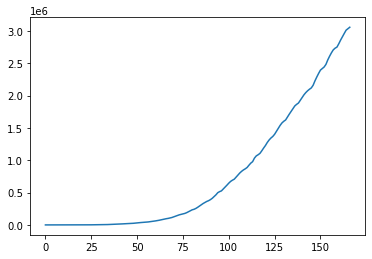

In [6]:
plt.plot(df1)

In [142]:
df1

0            0
1            1
2            1
3            1
4            2
        ...   
160    2750318
161    2801921
162    2859073
163    2912212
164    2962442
Name: Total, Length: 165, dtype: int64

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [144]:
print(df1)

[[0.00000000e+00]
 [3.37559351e-07]
 [3.37559351e-07]
 [3.37559351e-07]
 [6.75118703e-07]
 [6.75118703e-07]
 [6.75118703e-07]
 [6.75118703e-07]
 [1.01267805e-06]
 [2.36291546e-06]
 [4.38827157e-06]
 [6.41362768e-06]
 [8.43898378e-06]
 [8.43898378e-06]
 [1.14770179e-05]
 [1.75530863e-05]
 [2.59920701e-05]
 [3.30808164e-05]
 [4.08446815e-05]
 [6.75118703e-05]
 [7.89888882e-05]
 [9.82297712e-05]
 [1.44475402e-04]
 [2.09624357e-04]
 [3.05153654e-04]
 [3.80766948e-04]
 [5.21866757e-04]
 [6.38324733e-04]
 [7.42968132e-04]
 [8.21281902e-04]
 [9.83985509e-04]
 [1.15344030e-03]
 [1.31749415e-03]
 [1.43665260e-03]
 [1.54568427e-03]
 [1.92982681e-03]
 [2.30688061e-03]
 [2.67009447e-03]
 [3.05693749e-03]
 [3.46943501e-03]
 [3.75703558e-03]
 [4.06961554e-03]
 [4.63030162e-03]
 [5.37630779e-03]
 [6.02779734e-03]
 [6.62899054e-03]
 [6.99659268e-03]
 [7.48335326e-03]
 [7.90901560e-03]
 [8.52742433e-03]
 [9.55968083e-03]
 [1.02702433e-02]
 [1.13696741e-02]
 [1.23543347e-02]
 [1.30480192e-02]
 [1.369849

In [145]:
training_size=int(len(df1)*0.60)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [146]:
training_size,test_size

(99, 66)

In [147]:
train_data

array([[0.00000000e+00],
       [3.37559351e-07],
       [3.37559351e-07],
       [3.37559351e-07],
       [6.75118703e-07],
       [6.75118703e-07],
       [6.75118703e-07],
       [6.75118703e-07],
       [1.01267805e-06],
       [2.36291546e-06],
       [4.38827157e-06],
       [6.41362768e-06],
       [8.43898378e-06],
       [8.43898378e-06],
       [1.14770179e-05],
       [1.75530863e-05],
       [2.59920701e-05],
       [3.30808164e-05],
       [4.08446815e-05],
       [6.75118703e-05],
       [7.89888882e-05],
       [9.82297712e-05],
       [1.44475402e-04],
       [2.09624357e-04],
       [3.05153654e-04],
       [3.80766948e-04],
       [5.21866757e-04],
       [6.38324733e-04],
       [7.42968132e-04],
       [8.21281902e-04],
       [9.83985509e-04],
       [1.15344030e-03],
       [1.31749415e-03],
       [1.43665260e-03],
       [1.54568427e-03],
       [1.92982681e-03],
       [2.30688061e-03],
       [2.67009447e-03],
       [3.05693749e-03],
       [3.46943501e-03],


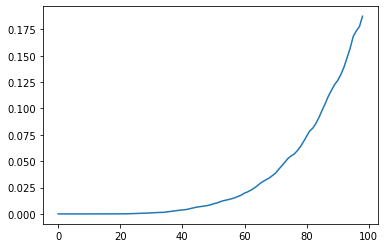

In [148]:
plt.plot(train_data)

In [149]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [150]:
time_step = 55
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [151]:
print(X_train.shape), print(y_train.shape)

(43, 55)
(43,)


(None, None)

In [152]:
print(X_test.shape), print(ytest.shape)

(10, 55)
(10,)


(None, None)

In [153]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import BatchNormalization


In [155]:
model=Sequential()
model.add(LSTM(128,input_shape=(55, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [156]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [161]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=1,verbose=1)

Epoch 1/200
43/43 [==============================] - 0s 9ms/step - loss: 5.9455e-06 - val_loss: 0.0015
Epoch 2/200
43/43 [==============================] - 0s 8ms/step - loss: 9.1424e-06 - val_loss: 0.0027
Epoch 3/200
43/43 [==============================] - 0s 7ms/step - loss: 1.0325e-05 - val_loss: 0.0092
Epoch 4/200
43/43 [==============================] - 0s 9ms/step - loss: 1.3244e-05 - val_loss: 0.0030
Epoch 5/200
43/43 [==============================] - 0s 7ms/step - loss: 6.9605e-06 - val_loss: 0.0036
Epoch 6/200
43/43 [==============================] - 0s 7ms/step - loss: 8.7615e-06 - val_loss: 0.0015
Epoch 7/200
43/43 [==============================] - 0s 8ms/step - loss: 8.1479e-06 - val_loss: 0.0022
Epoch 8/200
43/43 [==============================] - 0s 8ms/step - loss: 1.2590e-05 - val_loss: 0.0081
Epoch 9/200
43/43 [==============================] - 0s 8ms/step - loss: 1.4394e-05 - val_loss: 4.9851e-04
Epoch 10/200
43/43 [==============================] - 0s 8ms/step - l

43/43 [==============================] - 0s 8ms/step - loss: 1.1439e-06 - val_loss: 0.0017
Epoch 158/200
43/43 [==============================] - 0s 8ms/step - loss: 1.9595e-06 - val_loss: 0.0014
Epoch 159/200
43/43 [==============================] - 0s 8ms/step - loss: 1.4666e-06 - val_loss: 0.0017
Epoch 160/200
43/43 [==============================] - 0s 8ms/step - loss: 4.5096e-06 - val_loss: 0.0018
Epoch 161/200
43/43 [==============================] - 0s 8ms/step - loss: 4.9774e-06 - val_loss: 0.0036
Epoch 162/200
43/43 [==============================] - 0s 8ms/step - loss: 2.1700e-06 - val_loss: 0.0024
Epoch 163/200
43/43 [==============================] - 0s 8ms/step - loss: 2.3022e-06 - val_loss: 0.0021
Epoch 164/200
43/43 [==============================] - 0s 8ms/step - loss: 3.0773e-06 - val_loss: 0.0029
Epoch 165/200
43/43 [==============================] - 0s 9ms/step - loss: 2.4053e-06 - val_loss: 0.0031
Epoch 166/200
43/43 [==============================] - 0s 9ms/step - 

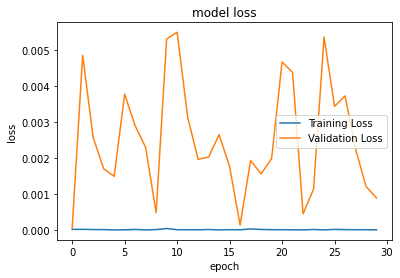

In [160]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [130]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Training RMSE

In [131]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.0035524727394187078

Validation RMSE

In [132]:

math.sqrt(mean_squared_error(ytest,test_predict))

0.04821475569748941

Training MEA

In [133]:
mean_absolute_error(y_train,train_predict)

0.002995685750540167

Validation MEA

In [134]:
mean_absolute_error(ytest,test_predict)

0.04531344297964083

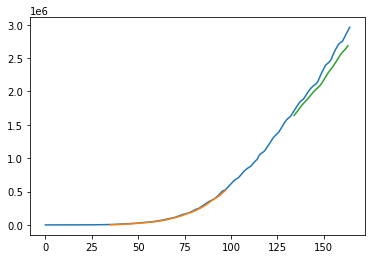

In [135]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
look_back=35
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [64]:
len(test_data)

74

In [110]:
x_input=test_data[19:].reshape(1,-1)
x_input.shape


(1, 55)

In [111]:
x_input

array([[0.15182024, 0.15751656, 0.16388347, 0.1702384 , 0.17669092,
        0.18356177, 0.19007079, 0.19579622, 0.20212318, 0.20960413,
        0.21749656, 0.22590892, 0.23499359, 0.24364051, 0.25137942,
        0.26031456, 0.2699414 , 0.28033129, 0.29074972, 0.30224508,
        0.31343683, 0.3239032 , 0.33432219, 0.34541064, 0.35793615,
        0.37090169, 0.38460915, 0.39827324, 0.41111436, 0.42432473,
        0.43891281, 0.45363158, 0.46947581, 0.48531718, 0.50192845,
        0.51801009, 0.53508421, 0.55369356, 0.57393573, 0.59380807,
        0.61515914, 0.63812191, 0.65912769, 0.68148265, 0.70750789,
        0.7351551 , 0.76305628, 0.79163318, 0.81955948, 0.84608865,
        0.87441387, 0.9043645 , 0.93573563, 0.96854383, 1.        ]])

In [112]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [113]:
temp_input

[0.15182024262292088,
 0.15751656218753282,
 0.1638834734251654,
 0.1702383996201312,
 0.17669091830538344,
 0.18356177205133709,
 0.1900707916520183,
 0.1957962177488209,
 0.20212317884423098,
 0.20960412833355402,
 0.21749656428776887,
 0.22590892280719377,
 0.2349935851485917,
 0.24364050807449444,
 0.25137942133931135,
 0.26031455600553366,
 0.26994139884852275,
 0.2803312894079617,
 0.29074971578327385,
 0.3022450838496413,
 0.31343683083511775,
 0.3239031973810969,
 0.3343221944727266,
 0.34541064180474196,
 0.3579361528241326,
 0.37090168612428825,
 0.3846091506371477,
 0.39827324070987974,
 0.4111143578528282,
 0.4243247284531761,
 0.438912808243883,
 0.4536315820712893,
 0.46947580847673526,
 0.485317181300594,
 0.5019284504367122,
 0.5180100948302233,
 0.5350842148998051,
 0.5536935618633659,
 0.5739357282111924,
 0.593808070385302,
 0.6151591385379618,
 0.6381219095711409,
 0.6591276943517348,
 0.6814826525068144,
 0.7075078872995073,
 0.7351550978664341,
 0.7630562771946325

In [114]:
from numpy import array

lst_output=[]
n_steps=55
i=0
while(i<180):
    
    if(len(temp_input)>55):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0344447]
56
1 day input [0.15751656 0.16388347 0.1702384  0.17669092 0.18356177 0.19007079
 0.19579622 0.20212318 0.20960413 0.21749656 0.22590892 0.23499359
 0.24364051 0.25137942 0.26031456 0.2699414  0.28033129 0.29074972
 0.30224508 0.31343683 0.3239032  0.33432219 0.34541064 0.35793615
 0.37090169 0.38460915 0.39827324 0.41111436 0.42432473 0.43891281
 0.45363158 0.46947581 0.48531718 0.50192845 0.51801009 0.53508421
 0.55369356 0.57393573 0.59380807 0.61515914 0.63812191 0.65912769
 0.68148265 0.70750789 0.7351551  0.76305628 0.79163318 0.81955948
 0.84608865 0.87441387 0.9043645  0.93573563 0.96854383 1.
 1.03444469]
1 day output [[1.0688897]]
2 day input [0.16388347 0.1702384  0.17669092 0.18356177 0.19007079 0.19579622
 0.20212318 0.20960413 0.21749656 0.22590892 0.23499359 0.24364051
 0.25137942 0.26031456 0.2699414  0.28033129 0.29074972 0.30224508
 0.31343683 0.3239032  0.33432219 0.34541064 0.35793615 0.37090169
 0.38460915 0.39827324 0.41111436 0.42432473 0.43891281 0.

13 day output [[1.5199703]]
14 day input [0.25137942 0.26031456 0.2699414  0.28033129 0.29074972 0.30224508
 0.31343683 0.3239032  0.33432219 0.34541064 0.35793615 0.37090169
 0.38460915 0.39827324 0.41111436 0.42432473 0.43891281 0.45363158
 0.46947581 0.48531718 0.50192845 0.51801009 0.53508421 0.55369356
 0.57393573 0.59380807 0.61515914 0.63812191 0.65912769 0.68148265
 0.70750789 0.7351551  0.76305628 0.79163318 0.81955948 0.84608865
 0.87441387 0.9043645  0.93573563 0.96854383 1.         1.03444469
 1.06888974 1.10410392 1.13999832 1.17649317 1.21351492 1.25099277
 1.28885567 1.32703185 1.36544752 1.40402687 1.44269276 1.48136663
 1.5199703 ]
14 day output [[1.5584253]]
15 day input [0.26031456 0.2699414  0.28033129 0.29074972 0.30224508 0.31343683
 0.3239032  0.33432219 0.34541064 0.35793615 0.37090169 0.38460915
 0.39827324 0.41111436 0.42432473 0.43891281 0.45363158 0.46947581
 0.48531718 0.50192845 0.51801009 0.53508421 0.55369356 0.57393573
 0.59380807 0.61515914 0.63812191 

 2.01406121]
28 day output [[2.0439436]]
29 day input [0.42432473 0.43891281 0.45363158 0.46947581 0.48531718 0.50192845
 0.51801009 0.53508421 0.55369356 0.57393573 0.59380807 0.61515914
 0.63812191 0.65912769 0.68148265 0.70750789 0.7351551  0.76305628
 0.79163318 0.81955948 0.84608865 0.87441387 0.9043645  0.93573563
 0.96854383 1.         1.03444469 1.06888974 1.10410392 1.13999832
 1.17649317 1.21351492 1.25099277 1.28885567 1.32703185 1.36544752
 1.40402687 1.44269276 1.48136663 1.5199703  1.55842531 1.59665453
 1.63458288 1.6721375  1.7092489  1.74585152 1.78188419 1.81729007
 1.85201776 1.88602114 1.91925955 1.95169771 1.98330629 2.01406121
 2.04394364]
29 day output [[2.07294]]
30 day input [0.43891281 0.45363158 0.46947581 0.48531718 0.50192845 0.51801009
 0.53508421 0.55369356 0.57393573 0.59380807 0.61515914 0.63812191
 0.65912769 0.68148265 0.70750789 0.7351551  0.76305628 0.79163318
 0.81955948 0.84608865 0.87441387 0.9043645  0.93573563 0.96854383
 1.         1.03444469 

42 day output [[2.3705525]]
43 day input [0.68148265 0.70750789 0.7351551  0.76305628 0.79163318 0.81955948
 0.84608865 0.87441387 0.9043645  0.93573563 0.96854383 1.
 1.03444469 1.06888974 1.10410392 1.13999832 1.17649317 1.21351492
 1.25099277 1.28885567 1.32703185 1.36544752 1.40402687 1.44269276
 1.48136663 1.5199703  1.55842531 1.59665453 1.63458288 1.6721375
 1.7092489  1.74585152 1.78188419 1.81729007 1.85201776 1.88602114
 1.91925955 1.95169771 1.98330629 2.01406121 2.04394364 2.07294011
 2.10104179 2.12824488 2.15454912 2.17995906 2.20448208 2.22812939
 2.25091434 2.27285314 2.29396462 2.31426811 2.3337853  2.35253906
 2.37055254]
43 day output [[2.3878508]]
44 day input [0.70750789 0.7351551  0.76305628 0.79163318 0.81955948 0.84608865
 0.87441387 0.9043645  0.93573563 0.96854383 1.         1.03444469
 1.06888974 1.10410392 1.13999832 1.17649317 1.21351492 1.25099277
 1.28885567 1.32703185 1.36544752 1.40402687 1.44269276 1.48136663
 1.5199703  1.55842531 1.59665453 1.6345828

57 day input [1.10410392 1.13999832 1.17649317 1.21351492 1.25099277 1.28885567
 1.32703185 1.36544752 1.40402687 1.44269276 1.48136663 1.5199703
 1.55842531 1.59665453 1.63458288 1.6721375  1.7092489  1.74585152
 1.78188419 1.81729007 1.85201776 1.88602114 1.91925955 1.95169771
 1.98330629 2.01406121 2.04394364 2.07294011 2.10104179 2.12824488
 2.15454912 2.17995906 2.20448208 2.22812939 2.25091434 2.27285314
 2.29396462 2.31426811 2.3337853  2.35253906 2.37055254 2.38785076
 2.40445781 2.42039824 2.43569732 2.45037961 2.46446967 2.4779911
 2.49096799 2.50342298 2.51537871 2.5268569  2.53787851 2.54846406
 2.55863285]
57 day output [[2.5684035]]
58 day input [1.13999832 1.17649317 1.21351492 1.25099277 1.28885567 1.32703185
 1.36544752 1.40402687 1.44269276 1.48136663 1.5199703  1.55842531
 1.59665453 1.63458288 1.6721375  1.7092489  1.74585152 1.78188419
 1.81729007 1.85201776 1.88602114 1.91925955 1.95169771 1.98330629
 2.01406121 2.04394364 2.07294011 2.10104179 2.12824488 2.154549

 2.66040301]
70 day output [[2.66637]]
71 day input [1.63458288 1.6721375  1.7092489  1.74585152 1.78188419 1.81729007
 1.85201776 1.88602114 1.91925955 1.95169771 1.98330629 2.01406121
 2.04394364 2.07294011 2.10104179 2.12824488 2.15454912 2.17995906
 2.20448208 2.22812939 2.25091434 2.27285314 2.29396462 2.31426811
 2.3337853  2.35253906 2.37055254 2.38785076 2.40445781 2.42039824
 2.43569732 2.45037961 2.46446967 2.4779911  2.49096799 2.50342298
 2.51537871 2.5268569  2.53787851 2.54846406 2.55863285 2.56840348
 2.57779408 2.58682203 2.59550333 2.6038537  2.61188865 2.61962199
 2.62706733 2.63423753 2.64114475 2.64780092 2.65421677 2.66040301
 2.66636992]
71 day output [[2.6721263]]
72 day input [1.6721375  1.7092489  1.74585152 1.78188419 1.81729007 1.85201776
 1.88602114 1.91925955 1.95169771 1.98330629 2.01406121 2.04394364
 2.07294011 2.10104179 2.12824488 2.15454912 2.17995906 2.20448208
 2.22812939 2.25091434 2.27285314 2.29396462 2.31426811 2.3337853
 2.35253906 2.37055254 2

83 day output [[2.7276547]]
84 day input [2.07294011 2.10104179 2.12824488 2.15454912 2.17995906 2.20448208
 2.22812939 2.25091434 2.27285314 2.29396462 2.31426811 2.3337853
 2.35253906 2.37055254 2.38785076 2.40445781 2.42039824 2.43569732
 2.45037961 2.46446967 2.4779911  2.49096799 2.50342298 2.51537871
 2.5268569  2.53787851 2.54846406 2.55863285 2.56840348 2.57779408
 2.58682203 2.59550333 2.6038537  2.61188865 2.61962199 2.62706733
 2.63423753 2.64114475 2.64780092 2.65421677 2.66040301 2.66636992
 2.67212629 2.67768121 2.68304372 2.68822145 2.69322205 2.69805312
 2.70272136 2.70723295 2.71159458 2.71581221 2.71989131 2.72383714
 2.7276547 ]
84 day output [[2.7313495]]
85 day input [2.10104179 2.12824488 2.15454912 2.17995906 2.20448208 2.22812939
 2.25091434 2.27285314 2.29396462 2.31426811 2.3337853  2.35253906
 2.37055254 2.38785076 2.40445781 2.42039824 2.43569732 2.45037961
 2.46446967 2.4779911  2.49096799 2.50342298 2.51537871 2.5268569
 2.53787851 2.54846406 2.55863285 2.

96 day output [[2.7675576]]
97 day input [2.37055254 2.38785076 2.40445781 2.42039824 2.43569732 2.45037961
 2.46446967 2.4779911  2.49096799 2.50342298 2.51537871 2.5268569
 2.53787851 2.54846406 2.55863285 2.56840348 2.57779408 2.58682203
 2.59550333 2.6038537  2.61188865 2.61962199 2.62706733 2.63423753
 2.64114475 2.64780092 2.65421677 2.66040301 2.66636992 2.67212629
 2.67768121 2.68304372 2.68822145 2.69322205 2.69805312 2.70272136
 2.70723295 2.71159458 2.71581221 2.71989131 2.72383714 2.7276547
 2.73134947 2.73492503 2.73838663 2.74173856 2.74498391 2.74812746
 2.7511723  2.75412178 2.75697994 2.75974965 2.76243401 2.76503563
 2.76755762]
97 day output [[2.7700026]]
98 day input [2.38785076 2.40445781 2.42039824 2.43569732 2.45037961 2.46446967
 2.4779911  2.49096799 2.50342298 2.51537871 2.5268569  2.53787851
 2.54846406 2.55863285 2.56840348 2.57779408 2.58682203 2.59550333
 2.6038537  2.61188865 2.61962199 2.62706733 2.63423753 2.64114475
 2.64780092 2.65421677 2.66040301 2.

110 day output [[2.7958162]]
111 day input [2.55863285 2.56840348 2.57779408 2.58682203 2.59550333 2.6038537
 2.61188865 2.61962199 2.62706733 2.63423753 2.64114475 2.64780092
 2.65421677 2.66040301 2.66636992 2.67212629 2.67768121 2.68304372
 2.68822145 2.69322205 2.69805312 2.70272136 2.70723295 2.71159458
 2.71581221 2.71989131 2.72383714 2.7276547  2.73134947 2.73492503
 2.73838663 2.74173856 2.74498391 2.74812746 2.7511723  2.75412178
 2.75697994 2.75974965 2.76243401 2.76503563 2.76755762 2.7700026
 2.7723732  2.77467108 2.77689981 2.77906108 2.78115702 2.78318977
 2.78516173 2.78707457 2.78893018 2.79073048 2.79247713 2.79417181
 2.79581618]
111 day output [[2.797412]]
112 day input [2.56840348 2.57779408 2.58682203 2.59550333 2.6038537  2.61188865
 2.61962199 2.62706733 2.63423753 2.64114475 2.64780092 2.65421677
 2.66040301 2.66636992 2.67212629 2.67768121 2.68304372 2.68822145
 2.69322205 2.69805312 2.70272136 2.70723295 2.71159458 2.71581221
 2.71989131 2.72383714 2.7276547 

125 day output [[2.8153927]]
126 day input [2.67212629 2.67768121 2.68304372 2.68822145 2.69322205 2.69805312
 2.70272136 2.70723295 2.71159458 2.71581221 2.71989131 2.72383714
 2.7276547  2.73134947 2.73492503 2.73838663 2.74173856 2.74498391
 2.74812746 2.7511723  2.75412178 2.75697994 2.75974965 2.76243401
 2.76503563 2.76755762 2.7700026  2.7723732  2.77467108 2.77689981
 2.77906108 2.78115702 2.78318977 2.78516173 2.78707457 2.78893018
 2.79073048 2.79247713 2.79417181 2.79581618 2.79741192 2.79896045
 2.8004632  2.80192137 2.80333662 2.80471015 2.80604315 2.80733681
 2.8085928  2.80981159 2.8109951  2.8121438  2.81325912 2.81434155
 2.81539273]
126 day output [[2.8164127]]
127 day input [2.67768121 2.68304372 2.68822145 2.69322205 2.69805312 2.70272136
 2.70723295 2.71159458 2.71581221 2.71989131 2.72383714 2.7276547
 2.73134947 2.73492503 2.73838663 2.74173856 2.74498391 2.74812746
 2.7511723  2.75412178 2.75697994 2.75974965 2.76243401 2.76503563
 2.76755762 2.7700026  2.772373

139 day output [[2.8272588]]
140 day input [2.73492503 2.73838663 2.74173856 2.74498391 2.74812746 2.7511723
 2.75412178 2.75697994 2.75974965 2.76243401 2.76503563 2.76755762
 2.7700026  2.7723732  2.77467108 2.77689981 2.77906108 2.78115702
 2.78318977 2.78516173 2.78707457 2.78893018 2.79073048 2.79247713
 2.79417181 2.79581618 2.79741192 2.79896045 2.8004632  2.80192137
 2.80333662 2.80471015 2.80604315 2.80733681 2.8085928  2.80981159
 2.8109951  2.8121438  2.81325912 2.81434155 2.81539273 2.81641269
 2.81740284 2.81836438 2.81929755 2.82020378 2.82108331 2.82193708
 2.82276654 2.82357144 2.82435322 2.82511187 2.82584882 2.82656431
 2.82725883]
140 day output [[2.8279335]]
141 day input [2.73838663 2.74173856 2.74498391 2.74812746 2.7511723  2.75412178
 2.75697994 2.75974965 2.76243401 2.76503563 2.76755762 2.7700026
 2.7723732  2.77467108 2.77689981 2.77906108 2.78115702 2.78318977
 2.78516173 2.78707457 2.78893018 2.79073048 2.79247713 2.79417181
 2.79581618 2.79741192 2.7989604

153 day output [[2.8351135]]
154 day input [2.77467108 2.77689981 2.77906108 2.78115702 2.78318977 2.78516173
 2.78707457 2.78893018 2.79073048 2.79247713 2.79417181 2.79581618
 2.79741192 2.79896045 2.8004632  2.80192137 2.80333662 2.80471015
 2.80604315 2.80733681 2.8085928  2.80981159 2.8109951  2.8121438
 2.81325912 2.81434155 2.81539273 2.81641269 2.81740284 2.81836438
 2.81929755 2.82020378 2.82108331 2.82193708 2.82276654 2.82357144
 2.82435322 2.82511187 2.82584882 2.82656431 2.82725883 2.82793355
 2.82858849 2.82922459 2.82984209 2.83044171 2.83102393 2.83158922
 2.83213806 2.83267117 2.83318853 2.83369136 2.8341794  2.83465362
 2.83511353]
154 day output [[2.8355606]]
155 day input [2.77689981 2.77906108 2.78115702 2.78318977 2.78516173 2.78707457
 2.78893018 2.79073048 2.79247713 2.79417181 2.79581618 2.79741192
 2.79896045 2.8004632  2.80192137 2.80333662 2.80471015 2.80604315
 2.80733681 2.8085928  2.80981159 2.8109951  2.8121438  2.81325912
 2.81434155 2.81539273 2.816412

167 day output [[2.8403213]]
168 day input [2.8004632  2.80192137 2.80333662 2.80471015 2.80604315 2.80733681
 2.8085928  2.80981159 2.8109951  2.8121438  2.81325912 2.81434155
 2.81539273 2.81641269 2.81740284 2.81836438 2.81929755 2.82020378
 2.82108331 2.82193708 2.82276654 2.82357144 2.82435322 2.82511187
 2.82584882 2.82656431 2.82725883 2.82793355 2.82858849 2.82922459
 2.82984209 2.83044171 2.83102393 2.83158922 2.83213806 2.83267117
 2.83318853 2.83369136 2.8341794  2.83465362 2.83511353 2.83556056
 2.83599472 2.83641624 2.83682513 2.83722258 2.83760858 2.83798361
 2.83834767 2.83870125 2.83904433 2.83937788 2.83970165 2.84001565
 2.8403213 ]
168 day output [[2.8406177]]
169 day input [2.80192137 2.80333662 2.80471015 2.80604315 2.80733681 2.8085928
 2.80981159 2.8109951  2.8121438  2.81325912 2.81434155 2.81539273
 2.81641269 2.81740284 2.81836438 2.81929755 2.82020378 2.82108331
 2.82193708 2.82276654 2.82357144 2.82435322 2.82511187 2.82584882
 2.82656431 2.82725883 2.827933

In [115]:
day_new=np.arange(1,56)
day_pred=np.arange(56,236)

In [116]:
import matplotlib.pyplot as plt

In [117]:
len(df1)

185

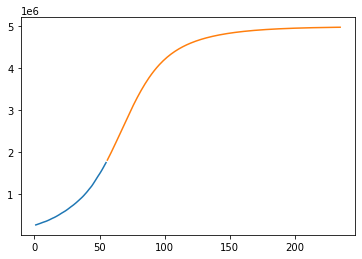

In [118]:
plt.plot(day_new,scaler.inverse_transform(df1[130:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

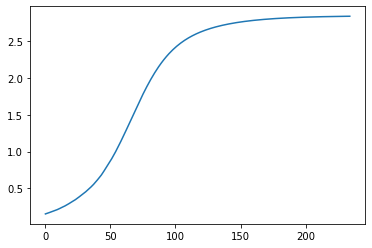

In [125]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[130:])

In [126]:
df3=scaler.inverse_transform(df3).tolist()

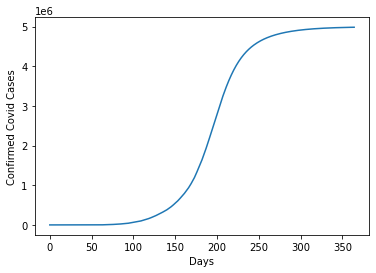

In [127]:
plt.plot(df3)
plt.ylabel("Confirmed Covid Cases")
plt.xlabel("Days")
plt.savefig("graph.png", dpi=1000)
